In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("diabetes-dataset 2.csv")

In [3]:
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


# Data Pre-Processing

First, we will describe the dataset in order to check whether there is null value present or not and what is the quality of our data.

In [4]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


As we can see from info() and describe() method, there is no null value present. However, min value for Glucose, Blood pressure, Skin thickness and insulin is zero which is practically not possible so these zeros can be considered as outlier which we need to remove.

In [6]:
df = dataframe.copy()

In [7]:
df["Glucose"].replace(0, df["Glucose"].mean(), inplace=True)
df["BloodPressure"].replace(0, df["BloodPressure"].mean(), inplace=True)
df["SkinThickness"].replace(0, df["SkinThickness"].mean(), inplace=True)
df["Insulin"].replace(0, df["Insulin"].mean(), inplace=True)
df["BMI"].replace(0, df["BMI"].mean(), inplace=True)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.970186,72.257047,26.932877,118.615412,32.643702,0.470930,33.090500,0.342000
std,3.306063,30.533180,11.968614,9.884003,88.366170,7.190337,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.935000,80.254000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,80.254000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Now, we can see that the Glucose, Blood pressure, Skin thickness and Insulin do not have any zero value present as we have replaced zero with individual column's mean value

# Data balancing

Now, we will check whether our data is balanced or not.

([<matplotlib.patches.Wedge at 0x122b85520>,
 [Text(-0.5238620008512992, 0.9672479537657722, 'Healthy'),
  Text(0.5714858191105077, -1.0551795859262973, 'Diabetics')],
 [Text(-0.2857429095552541, 0.5275897929631485, '65.80%'),
  Text(0.3333667278144628, -0.6155214251236735, '34.20%')])

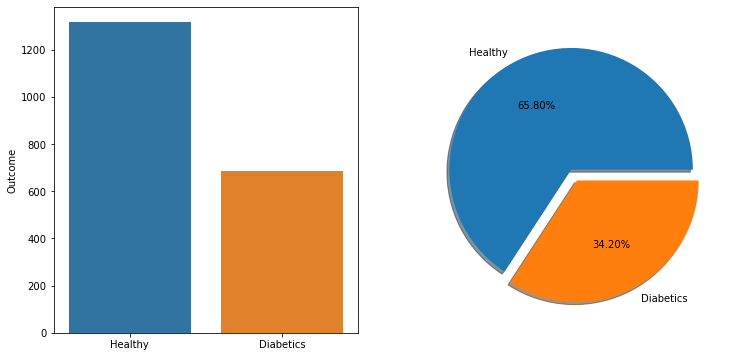

In [9]:
labels = ['Healthy', 'Diabetics']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
sns.barplot(y = df['Outcome'].value_counts(),x = labels, ax = ax1)
explode=np.zeros(len(labels))
explode[-1]=0.1
ax2.pie(df['Outcome'].value_counts(), labels = labels,shadow=True, autopct='%.2f%%', explode = explode)

It can be seen that nearly 66% patients are healthy and 34% of them are suffered from Diabetes. Here, our data is unbalanced so we need to balance it. Here, we will use Smote method to balance the dataset.

In [10]:
df1 = df.copy()

print('Original class distribution:')
print(df1['Outcome'].value_counts())

xf = df1.columns
X = df1.drop(['Outcome'],axis=1)
Y = df1['Outcome']

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df1 = pd.DataFrame(X, columns=xf)
df1['Outcome'] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    1316
1     684
Name: Outcome, dtype: int64

Class distribution after applying SMOTE Technique:
1    1316
0    1316
Name: Outcome, dtype: int64


In [11]:
print(df1.shape)
X = df1.drop(['Outcome'],axis=1)
Y = df1['Outcome']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

(2632, 9)
Original set  --->  (2632, 8) (2632,) 
Training set  --->  (2105, 8) (2105,) 
Testing set   --->  (527, 8)  (527,)
